# Here I test some usage of my neurolib

In [1]:
# libs
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import Neurolib as nl

def rnd(a, b):
    return random.random() * (b - a) + a

-0.5493013660856063


## Sine aproximation

In [2]:
# creating a model

name = "sine_v5"
layers = [1, 50, 30, 10, 1]

#os.makedir(name)
nl.gen_neuro_layers(layers, name)

model_sin = nl.NeuroNet(name)

# make func thar use neuro to aprox sine in np

neuro_sin = np.vectorize(lambda x: model_sin.get_result(np.array([[x]]))[0, 0])

# make chaking accurasy func


def mnsq(test_data):
    correct_result = np.sin(test_data)
    current_result = 2 * neuro_sin(test_data)
    return math.sqrt(np.mean(np.square(correct_result - current_result)))

In [ ]:
# train
n = 10000
current_mnsq = np.zeros(n)

for i in range(n):
    n_of_dots = 1000
    x = np.array([[[rnd(-40, 40)]] for _ in range(n_of_dots)])
    model_sin.learn_on_range_of_data(n_of_dots, x, 0.5 * np.sin(x), 0.0001)
    current_mnsq[i] = mnsq(np.linspace(-30, 30, 1000))
    print(f"\r{i}         ")
    
model_sin.save_neuro()

plt.title("mnsq", fontsize=15)
plt.plot(current_mnsq)
plt.xlabel('stages', fontsize=15)
plt.ylabel('mnsq', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.show()
print()
print(f"mnsq{mnsq(np.linspace(-40, 40, 1000))}")

424              

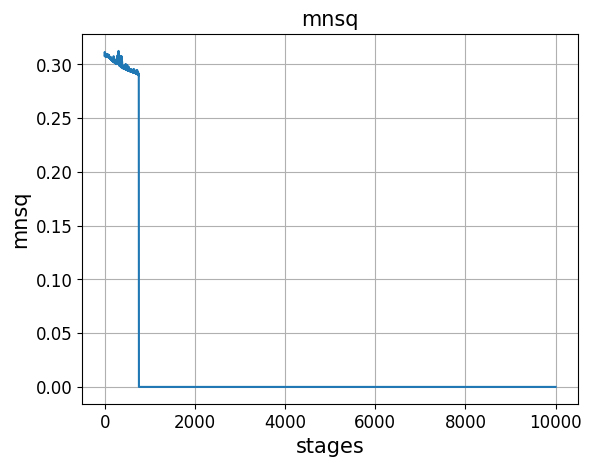

In [9]:
# just show mnsq
plt.title("mnsq", fontsize=15)
plt.plot(current_mnsq)
plt.xlabel('stages', fontsize=15)
plt.ylabel('mnsq', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.show()

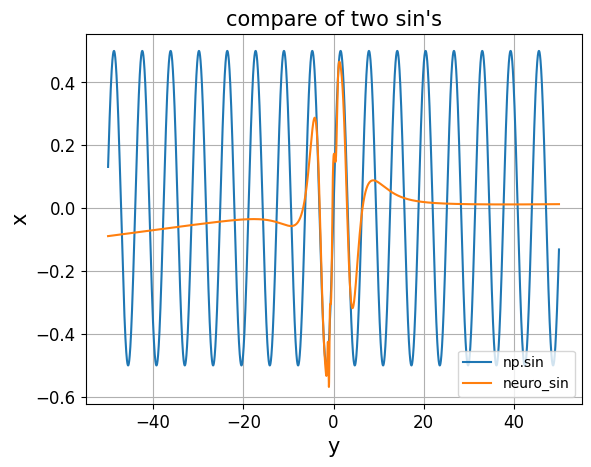

In [5]:
# show the result
based_sin = np.linspace(-50, 50, 10000)

plt.plot(based_sin, np.sin(based_sin), label="np.sin")
plt.plot(based_sin, 2 * neuro_sin(based_sin), label="neuro_sin")

plt.title("compare of two sin's", fontsize=15)
plt.legend(loc='lower right', fontsize = 10)

plt.xlabel('y', fontsize=15)
plt.ylabel('x', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.show()


## Image compression

In [3]:
name = "image_v1"
layers = [2, 200, 200, 3]

#os.makedir(name)
#nl.gen_neuro_layers(layers, name)

model_image = nl.NeuroNet(name)

#upload image
img1 = Image.open("test_img.bmp")
pixels = img1.load()
size = img1.size
img1.show()


def show_img():
    global model_image
    img2 = Image.new("RGB", size, (0, 0, 0))
    pixels2 = img2.load()
    for i in range(size[0]):
        for j in range(size[1]):
            pixel = (model_image.get_result(np.array([[(i - size[0] / 2) / size[0], (j - size[1] / 2) / size[1] ]]) ) + 0.5) * 256
            pixels2[i, j] = int(pixel[0, 0]), int(pixel[0, 1]), int(pixel[0, 2])
    img2.show()
show_img()

In [ ]:
n = 10
for i in range(n):
    lst = [(i, j) for i in range(size[0]) for j in range(size[1])]
    for x, y in lst:
        r, g, b = pixels[x, y]
        model_image.learn(np.array([[x / size[0] - 0.5, y / size[1] - 0.5]]), np.array([[r, g, b]]) / 256 - 0.5, 0.001)
show_img()

In [ ]:
show_img()

In [25]:
model_image.save_neuro()

In [ ]:
n = 10000000
for i in range(n):
    x, y = random.randint(0, size[0] - 1), random.randint(0, size[1] - 1)
    r, g, b = pixels[x, y]
    model_image.learn(np.array([[x / size[0] - 0.5, y / size[1] - 0.5]]), np.array([[r, g, b]]) / 256 - 0.5, 0.001)
show_img()